In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pathlib import Path

In [3]:
!wget -i /content/datalinks.txt -P data/pikabu

--2023-12-09 22:37:34--  https://huggingface.co/api/datasets/IlyaGusev/pikabu/parquet/default/train/0.parquet
Resolving huggingface.co (huggingface.co)... 99.84.108.129, 99.84.108.55, 99.84.108.70, ...
Connecting to huggingface.co (huggingface.co)|99.84.108.129|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://huggingface.co/datasets/IlyaGusev/pikabu/resolve/refs%2Fconvert%2Fparquet/default/partial-train/0000.parquet [following]
--2023-12-09 22:37:34--  https://huggingface.co/datasets/IlyaGusev/pikabu/resolve/refs%2Fconvert%2Fparquet/default/partial-train/0000.parquet
Reusing existing connection to huggingface.co:443.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs.huggingface.co/repos/f1/c6/f1c6e37743fd46d4065a77ea01b5e8eee14fc52c92a41c9ebba35e6e234750d4/1ce5808a6348403ac1ffd9f8a47558de130c57a92e0be9700cafb485f7aa85e5?response-content-disposition=attachment%3B+filename*%3DUTF-8%27%270000.parquet%3B+filename%3D%220000.par

In [4]:
def wilson_score(pluses: int, minuses: int, eps: float = 1e-7) -> float:
    n = pluses + minuses
    p = pluses / (n + eps)
    return np.where(n > 0, _wilson_score(p, n), 0)

def _wilson_score(p: int, n: int) -> float:
    q = 1.96
    return (p + q**2 / (2*n) ) / (1 + q**2/n)

def merge_dataset(roots: list) -> pd.DataFrame:
    """
    Function to merge all files, whose paths are in list "roots".
    roots -- list of roots to dataset files in .parquet extension
    """
    data = []
    for root in roots:
        if isinstance(data, pd.DataFrame):
            data = pd.concat([data, pd.read_parquet(root)], ignore_index=True)
        else:
            data = pd.read_parquet(root)
    return data

In [5]:
data_path = Path("/content/data/pikabu")
data = merge_dataset([data_path / "{}.parquet".format(i) for i in range(10)])

In [6]:
data.head()

,id,title,text_markdown,timestamp,author_id,username,rating,pluses,minuses,url,tags,blocks,comments
0,6991642,Что можно купить в Китае за цену нового iPhone...,Осенью в России стартовали продажи очередной м...,1571221527,2900955,chinatoday.ru,-4,9,13,https://pikabu.ru/story/chto_mozhno_kupit_v_ki...,"[Китай, AliExpress, Китайские товары, Бизнес, ...",{'data': ['<p>Осенью в России стартовали прода...,"{'id': [152116588, 152116426, 152114895, 15211..."
1,7178566,Последний оставшийся в живых освободитель Осве...,В канун 75-летия освобождения концлагеря и V В...,1579586602,1723707,sssr24,1339,1498,159,https://pikabu.ru/story/posledniy_ostavshiysya...,"[Великая Отечественная война, Чтобы помнили, О...",{'data': ['<p>В канун 75-летия освобождения ко...,"{'id': [159479910, 159460617, 159469842, 15947..."
2,7021067,Зима в Тюмень пришла.,И в честь этого я сочинил свой первый пирожок....,1572537738,2473821,ZS72,453,517,64,https://pikabu.ru/story/zima_v_tyumen_prishla_...,"[Стишки-Пирожки, Снег, Тюмень, Мат]",{'data': ['https://cs11.pikabu.ru/post_img/big...,"{'id': [153301402, 153301186, 153320089, 15332..."
3,7041076,Доброе утро,,1573533861,648409,Nightfalcon666,1,12,11,https://pikabu.ru/story/dobroe_utro_7041076,"[Юмор, Малыши, Доброе утро]",{'data': ['https://cs11.pikabu.ru/post_img/big...,"{'id': [154114018, 154114231, 158537916, 15411..."
4,7177157,Есть такая в черноземье сеть пиццерий...,"В общем, если в кратце, то заказал я как-то пе...",1579522525,2488762,RafaelMy,0,5,5,https://pikabu.ru/story/est_takaya_v_chernozem...,"[Delivery Club, Доставка еды, Пицца, Длиннопост]","{'data': ['<p>В общем, если в кратце, то заказ...","{'id': [159404342, 159405181, 159405887, 15940..."


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279000 entries, 0 to 278999
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             279000 non-null  int64 
 1   title          279000 non-null  object
 2   text_markdown  279000 non-null  object
 3   timestamp      279000 non-null  uint64
 4   author_id      279000 non-null  int64 
 5   username       279000 non-null  object
 6   rating         279000 non-null  int64 
 7   pluses         279000 non-null  int64 
 8   minuses        279000 non-null  int64 
 9   url            279000 non-null  object
 10  tags           279000 non-null  object
 11  blocks         279000 non-null  object
 12  comments       279000 non-null  object
dtypes: int64(5), object(7), uint64(1)
memory usage: 27.7+ MB


In [8]:
data.iloc[0]["blocks"].keys(), np.unique(data.iloc[0]["blocks"]["type"])

(dict_keys(['data', 'type']), array(['image', 'text'], dtype=object))

# Percent of posts containing images or videos

In [9]:
images_or_videos = ["image" in row["blocks"]["type"] or "video" in row["blocks"]["type"] for i, row in data.iterrows()]
data[images_or_videos].shape[0]/data.shape[0]

0.7432759856630824

In [10]:
# data containing posts with text only
text_data = data[~np.bool8(images_or_videos)]

In [11]:
text_data.shape

(71626, 13)

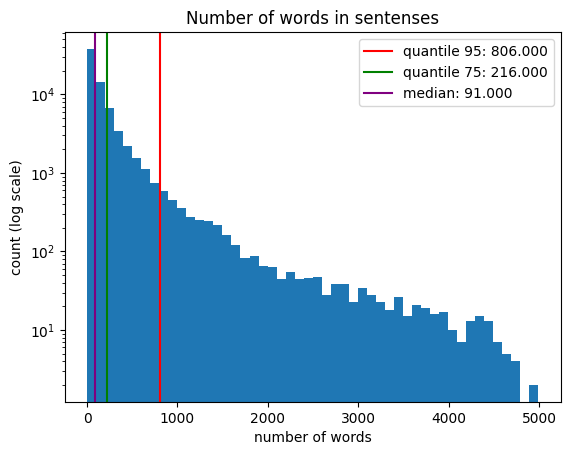

In [12]:
len_distrib = (text_data["text_markdown"].str.count(" ") + 1).tolist()
q95 = np.quantile(len_distrib, 0.95)
q75 = np.quantile(len_distrib, 0.75)
med = np.median(len_distrib)
plt.hist(len_distrib, bins=50)
plt.axvline(q95, label=f"quantile 95: {q95:.3f}", color="red")
plt.axvline(q75, label=f"quantile 75: {q75:.3f}", color="green")
plt.axvline(med, label=f"median: {med:.3f}", color="purple")
plt.title("Number of words in sentenses")
plt.xlabel("number of words")
plt.ylabel("count (log scale)")
plt.yscale("log")
plt.legend()

# Suspicious posts with markdown length 1

In [61]:
text_data[text_data["text_markdown"].str.count(" ") + 1 == 1]

,id,title,text_markdown,timestamp,author_id,username,rating,pluses,minuses,url,tags,blocks,comments
476,7007106,Опрос ) не обязательно указывать модератора)))...,saLITM/edit?no_redirect=true#responses,1571912786,2689725,dzyalisa,-17,0,17,https://pikabu.ru/story/opros__ne_obyazatelno_...,"[Универ, Учеба, Текст]",{'data': ['<p>saLITM/edit?no_redirect=true#res...,"{'id': [152741517, 152741655, 152741366, 15274..."
525,7009843,В этом году празднует своё 20-летние группа &q...,Бетономешалка...,1572019523,2850122,GRIMMJOY,-6,2,8,https://pikabu.ru/story/v_yetom_godu_prazdnuet...,"[Металлисты, Кувалда, Трэш металл, Дэтх, Митол...","{'data': ['<p>Бетономешалка...</p>'], 'type': ...","{'id': [152853055, 152853024], 'timestamp': [1..."
1145,7047280,Предлагаю сюда,https://pikabu-ru.cdn.ampproject.org/v/s/pikab...,1573808430,2972552,Saturn123,-16,0,16,https://pikabu.ru/story/predlagayu_syuda_7047280,"[Сатурн 5, Уран-1, Текст]","{'data': ['<p><!--noindex--><a href=""https://p...","{'id': [154371805, 154370954, 154370942, 15437..."
1611,6878882,"Это пустой пост , можете лайкать или хейтить...",.........,1566205964,2558798,itmaxruit,-11,1,12,https://pikabu.ru/story/yeto_pustoy_post__mozh...,"[Пустойпост, Пустота, Текст]","{'data': ['<p>.........</p>'], 'type': ['text']}","{'id': [147749831, 147916819, 147749420, 14774..."
2051,7179677,Поддержите подпиской на канал Мечта Охотника в...,https://youtu.be/FhuId7g2xfw,1579619636,3065956,HunterrAleksey,0,0,0,https://pikabu.ru/story/podderzhite_podpiskoy_...,"[Охота и рыбалка, Охота, Текст]","{'data': ['<p><!--noindex--><a href=""https://y...","{'id': [159500860, 159501045, 159501098, 15950..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
271116,3360426,Эта черт ова птица сделала мой день!!!!!,https://www.youtube.com/watch?v=0hKuIvC5AMQ,1432441871,943605,Skipper161,-12,0,12,https://pikabu.ru/story/yeta_chert_ova_ptitsa_...,"[Птицы, Какаду, Текст]",{'data': ['https://www.youtube.com/watch?v=0hK...,"{'id': [], 'timestamp': [], 'parent_id': [], '..."
272368,7415588,Забавные переписки,https://zen.yandex.ru/media/id/5e09079c9515ee0...,1588305309,3096130,ivan1124,-3,1,4,https://pikabu.ru/story/zabavnyie_perepiski_74...,"[Переписка, Забавное, Смех, Текст]","{'data': ['<p><!--noindex--><a href=""https://z...","{'id': [168173762, 168173766], 'timestamp': [1..."
274836,7395254,Целая история на экране выбора языка,https://vk.com/video_ext.php?oid=-66455&id;=45...,1587640628,1331741,Prosto4ell,-5,1,6,https://pikabu.ru/story/tselaya_istoriya_na_ye...,"[Компьютерные игры, Игры, Видео, Knock Harder:...",{'data': ['https://vk.com/video_ext.php?oid=-6...,"{'id': [167478365, 167478030], 'timestamp': [1..."
276862,1144922,Моя первая статья),Пффффф,1365085430,271119,Maxwell453,-8,2,10,https://pikabu.ru/story/moya_pervaya_statya_11...,"[Статья, Не судите строго]","{'data': ['Пффффф'], 'type': ['text']}","{'id': [9961963, 9962046, 9962024, 9962065, 99..."


# We remove urls from texts

In [ ]:
pattern = r'(https?:\/\/(?:www\.)?[-a-zA-Z0-9@:%._+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}[-a-zA-Z0-9()@:%_+.~#?&/=]*)'
text_data["text_markdown"] = text_data["text_markdown"].str.replace(pattern, '')

In [77]:
text_data[text_data["text_markdown"].str.count(" ") + 1 == 1]["rating"].mean()

-2.1345291479820627

# We discard data with zero pluses and minuses because we consider them unrated. Also we drop data with negative pluses and minuses becouse of incorrect format

In [14]:
text_data = text_data[~(((text_data['minuses'] == 0) & (text_data['pluses'] == 0)) | (text_data['minuses'] < 0) | (text_data['pluses'] < 0))]

In [15]:
text_data.shape

(67999, 13)

In [16]:
textlen = text_data["text_markdown"].str.count(" ").to_numpy()
rating = text_data["rating"].to_numpy()

In [17]:
# Check if we can use length of text markdown as feature (no)
np.corrcoef(textlen, rating)[0, 1]


0.0187144908436438

# Drop unnecessary columns

In [18]:
text_data.drop(columns=["blocks", "comments"], inplace=True)

In [19]:
text_data.head()

,id,title,text_markdown,timestamp,author_id,username,rating,pluses,minuses,url,tags
7,2936217,Рассада...,Аня: У тебя волосы в носу растут?\nПетя: Нет!\...,1419527068,453525,Misochkin,-9,5,14,https://pikabu.ru/story/rassada_2936217,"[Петр, Анна, Рассада, Волосы, Текст, Переписка..."
11,6991412,Про начальников и обеды,Недавно родственница жаловалась на дурдом на р...,1571215335,1699826,FluffyMagpie,641,681,40,https://pikabu.ru/story/pro_nachalnikov_i_obed...,"[Начальник, Руководитель, Обед, Еда, Сотрудник..."
15,6991359,"Помогите, пожалуйста. Поиск игры","Доброго времени суток, господа и дамы. Подскаж...",1571214218,878346,Keeeesha,-8,2,10,https://pikabu.ru/story/pomogite_pozhaluysta_p...,"[Игры, Мобильное приложение, Гонки, Без рейтин..."
23,7046576,Помогите найти песню,Там негр ходит по больнице и читает рэп он то ...,1573765844,2977368,dan0039,-12,1,13,https://pikabu.ru/story/pomogite_nayti_pesnyu_...,"[Ищу песню, Клип, Рэп, Негр, Больница, Текст]"
28,7044651,"А что, мужики? Что мы, начальника что ли подве...",Мы жуки-плавунцы или мужики российские ржаные ...,1573679356,2700638,SpookieNookie,-55,3,58,https://pikabu.ru/story/a_chto_muzhiki_chto_my...,"[Родина, Мужики, Текст]"


# Split indexes on train test val

In [20]:
from sklearn.model_selection import train_test_split
import json

In [21]:
indexes = text_data["id"].tolist()
train, test = train_test_split(indexes, test_size=0.1, shuffle=True, random_state=42)
train, val = train_test_split(train, test_size=0.1, shuffle=True, random_state=42)

In [30]:
save_dir = Path("/content/data/source")
save_dir.mkdir(exist_ok=True, parents=True)

text_data.to_parquet(save_dir / "texts.parquet")
with open(save_dir / "indexes.json", "w") as f:
    json.dump({
        "train": train,
        "val": val,
        "test": test
    }, f)